In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np

# load modules related to this exercise
import tools
import plots
from model import model_bufferstock

# Solving the buffer-stock consumption model

Consider the canonical buffer-stock consumption model:

Bellman equation in ratio form: 

$$\begin{align*}
v_{t}(m_{t}) & = \max_{c_{t}}\left\{ \frac{c_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[(G L_{t+1} \psi_{t+1})^{1-\rho}v_{t+1}(m_{t+1})\right]\right\} \\
 & \text{s.t.}\\
 a_t & =  m_t-c_t \\
m_{t+1} & =  \frac{1}{G L_t \psi_{t+1}}Ra_t+\xi_{t+1}\\ 
\xi_{t+1}& =  \begin{cases}
\mu  &\text{with prob. }\pi\\
(\epsilon_{t+1}-\pi \mu)/ (1-\pi) &\text{else}
\end{cases}\\ \\
a_t &\geq \lambda_t =  \begin{cases} 
-\lambda & if t < T_R\\
0 & if t \geq T_R
\end{cases} \\
\psi_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\psi},\sigma^2_{\psi})\\
\epsilon_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\xi},\sigma^2_{\xi}) \\
\end{align*}$$

and remember
$$\begin{align*}
Y_{t+1}& = \psi_{t+1} P_{t+1} \\
P_{t+1}& = GL_tP_t\psi_{t+1}\\ 
c_t & \equiv C_t/P_t \\
m_t & \equiv M_t/P_t \\
a_t & \equiv A_t/P_t \\
p_t & \equiv \ln(P_t) \\
y_t & \equiv \ln(Y_t) \\
\end{align*}$$



In [2]:
#Load baseline settings
model = model_bufferstock()


In [3]:
model.setup()

par = model.par
par.solmethod = 'vfi'

# Life-cycle settings
par.T = 90-par.age_min
par.Tr = 65-par.age_min
par.simT = par.T
par.simlifecycle = 1

# Income profile
par.L[0:par.Tr] = np.linspace(1,1/par.G,par.Tr)
par.L[par.Tr-1] = 0.9
par.L[par.Tr-1:] = par.L[par.Tr-1:]/par.G  

#Solve and simulate
model.create_grids()
model.solve()
model.simulate()

sol = model.sol
sim = model.sim


/Users/frederikp/OneDrive - University of Copenhagen/Kandidat/Dynamic Programming/dp2022/ex_post/model.py:147: RuntimeWarning: invalid value encountered in reciprocal
  par.FVA = par.beta*sum(par.w*(par.G*par.psi_vec)**(1-par.rho))


AttributeError: 'types.SimpleNamespace' object has no attribute 'grid_m'

#### Plots

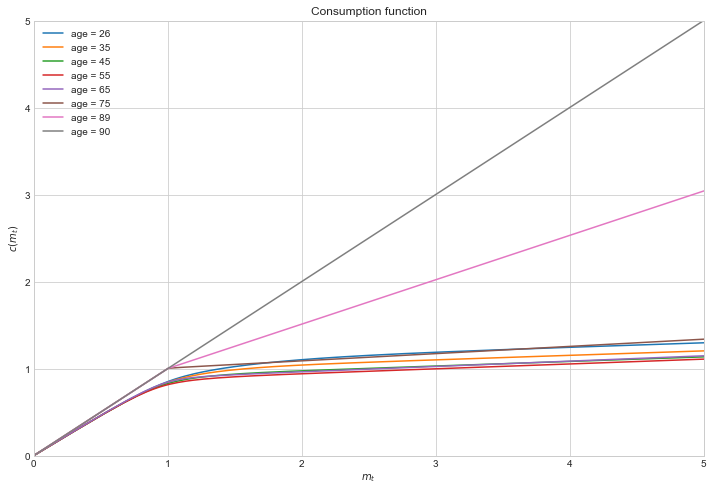

In [4]:
plots.plot_consumption(sol,par)

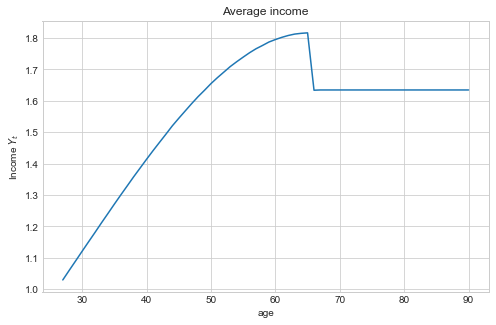

In [6]:
plots.plot_avg_income(sim,par)

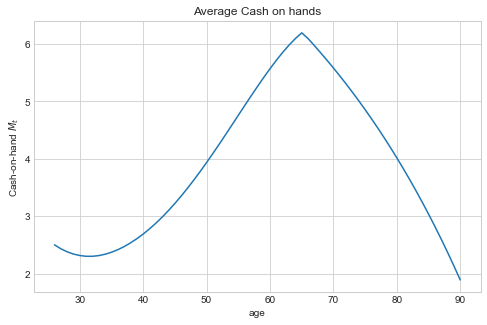

In [7]:
plots.plot_avg_cash_on_hand(sim,par)

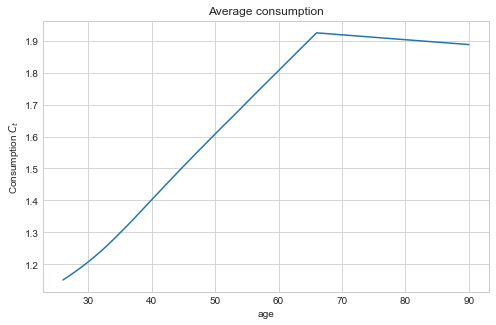

In [8]:

plots.plot_avg_consumption(sim,par)

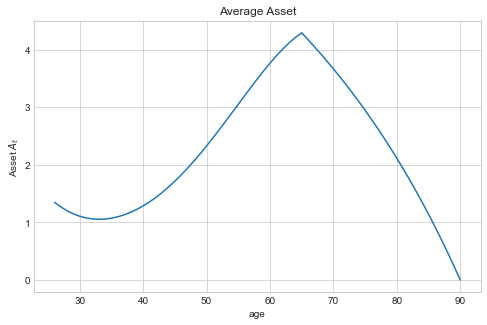

In [9]:
plots.plot_avg_assets(sim,par)